number of iterations: 102
Utility:
[[-8.47532098e+00 -8.36824001e+00 -8.18751383e+00 -7.96184131e+00
  -7.73217129e+00 -7.61026835e+00 -7.90575802e+00 -9.14667767e+00
  -1.11774262e+01 -1.10729467e+01 -2.53657764e+02 -9.29680999e+01
   1.70427582e+02  1.93586147e+02  2.19415394e+02  2.48146582e+02
   2.80016847e+02  3.12528024e+02  2.80017092e+02  2.48147082e+02]
 [-8.27694513e+00 -8.15081233e+00 -7.94139793e+00 -7.67926341e+00
  -7.40372420e+00 -7.22618710e+00 -7.49671233e+00 -8.92943207e+00
  -1.16078612e+01 -1.14292738e+01 -2.53956039e+02 -8.12092216e+01
   1.85634150e+02  2.13159005e+02  2.44471880e+02  2.80014002e+02
   3.20216850e+02  3.65451346e+02  3.20217128e+02  2.80017092e+02]
 [-8.05339855e+00 -7.90439091e+00 -7.66207100e+00 -7.35861447e+00
  -7.03088007e+00 -6.78492752e+00 -7.00375917e+00 -8.62502841e+00
  -1.21883023e+01 -1.19449838e+01 -2.54419594e+02 -7.22075659e+01
   1.98013160e+02  2.30183315e+02  2.67937922e+02  3.12496415e+02
   3.65448501e+02  4.28905955e+02  3.65

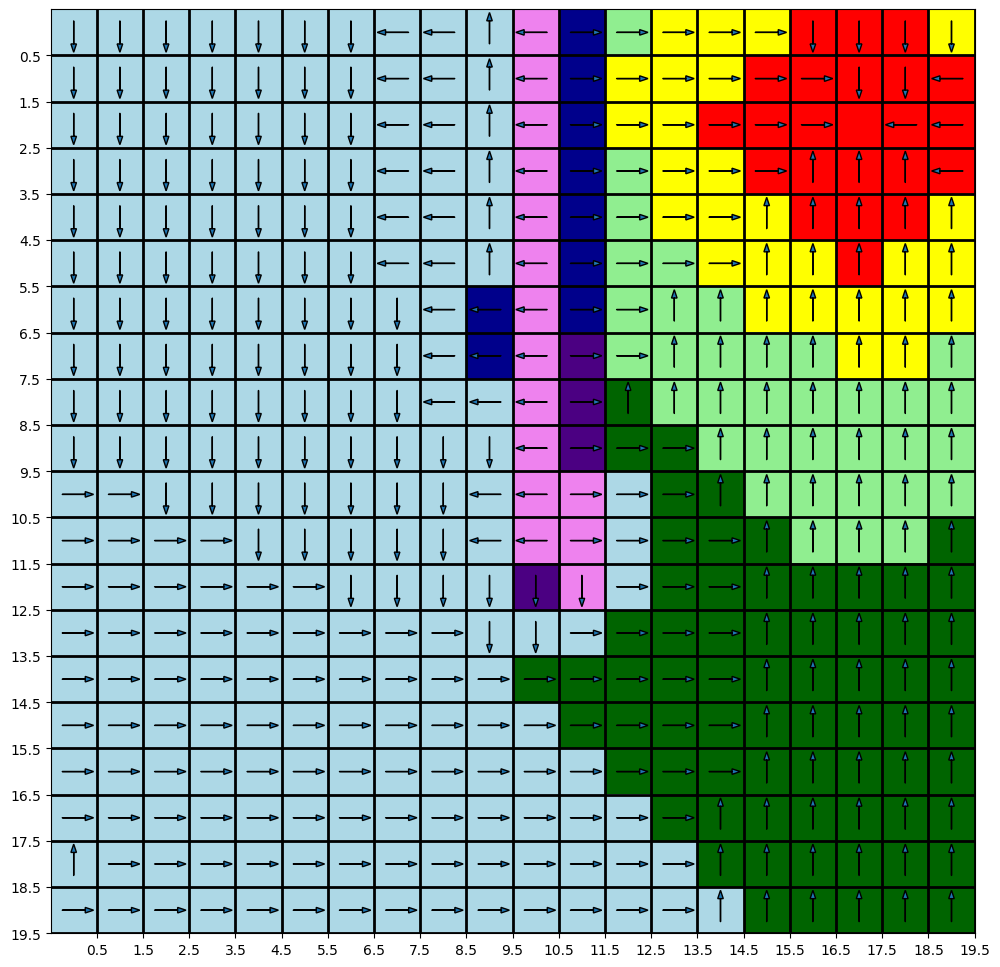

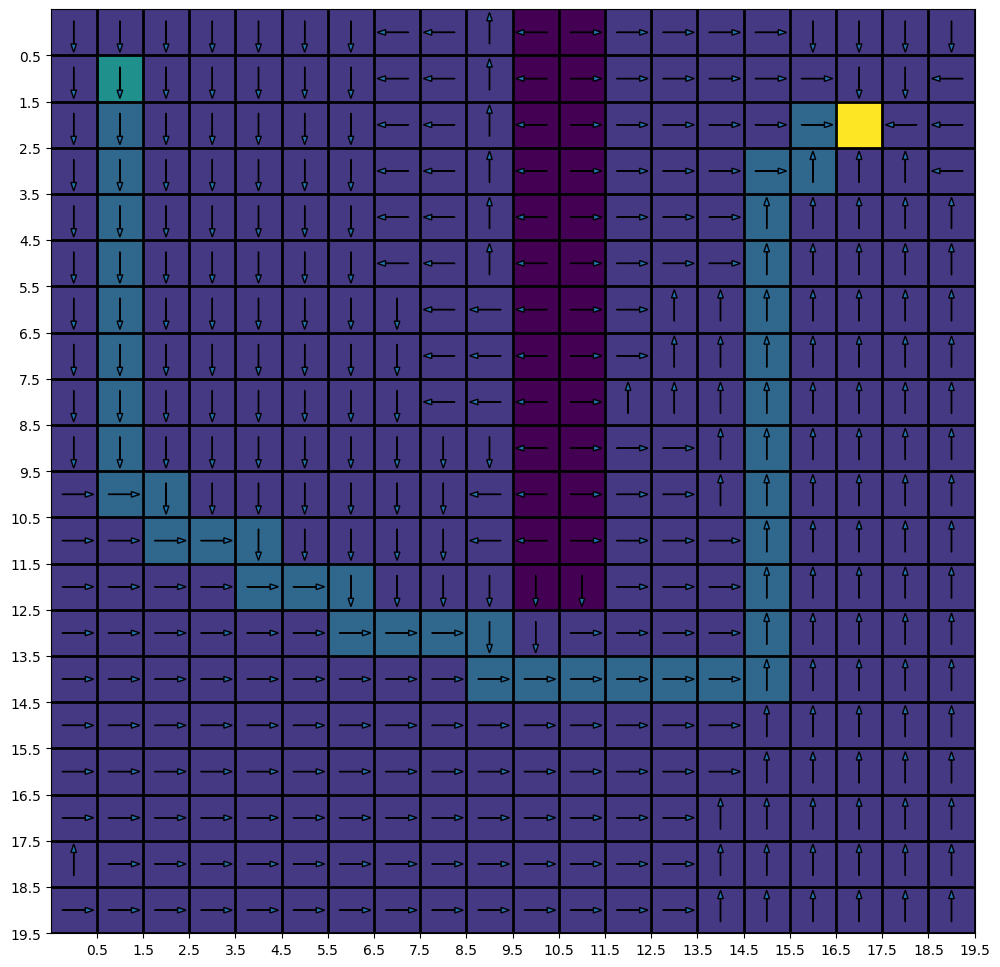

In [40]:
import random 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

class Policy:
    def __init__(self,policy_stable,policy):
        self.policy_stable = policy_stable
        self.policy = policy

# Policy Evaluation Function
# This function takes in a policy, model of the system and gives the 
# updated value function or the utility accordingly 
def policy_eval(policy,utility,reward,discount,uncertainity,grid_col=5,grid_row=5):
  # Grid definition
  GRID_COL = grid_col
  GRID_ROW = grid_row
  NUM_STATES = GRID_COL * GRID_ROW

  # ACTIONS
  NUM_ACTIONS = 4
  UP = 0
  RIGHT = 1
  DOWN = 2
  LEFT = 3

  # Transition Probability distribution
  transition_prob_dist = np.zeros((NUM_STATES,NUM_ACTIONS))
  y = discount

  # Matrices for solving system of linear equations
  A = np.zeros((NUM_STATES,NUM_STATES))
  b = np.zeros((NUM_STATES,1))

  state_iter = 0
  for i in range(GRID_ROW):
    for j in range(GRID_COL):
      if (policy[i,j]==UP):
        transition_prob_dist[state_iter] = [1-2*uncertainity, uncertainity, 0, uncertainity]
      elif (policy[i,j]==RIGHT):
        transition_prob_dist[state_iter] = [uncertainity, 1-2*uncertainity, uncertainity, 0]
      elif (policy[i,j]==DOWN):
        transition_prob_dist[state_iter] = [0, uncertainity, 1-2*uncertainity, uncertainity]
      elif (policy[i,j]==LEFT):
        transition_prob_dist[state_iter] = [uncertainity, 0, uncertainity, 1-2*uncertainity]
      state_iter += 1

  s = 0 # state iteration variable
  for m in range(GRID_ROW):
    for n in range(GRID_COL):
      b[s] = reward[m,n]
      if ((m == 0) and (n == 0)):
        A[s,s] = (1 - y*transition_prob_dist[s,UP] - y*transition_prob_dist[s,LEFT])
        A[s,s+1] = (-1*y*transition_prob_dist[s,RIGHT])
        A[s,s+GRID_COL] = (-1*y*transition_prob_dist[s,DOWN])
      elif ((m == 0) and (n == GRID_COL-1)):
        A[s,s] = (1 - y*transition_prob_dist[s,UP] - y*transition_prob_dist[s,RIGHT])
        A[s,s+GRID_COL] = (-1*y*transition_prob_dist[s,DOWN])
        A[s,s-1] = (-1*y*transition_prob_dist[s,LEFT])
      elif ((m == GRID_ROW-1) and (n == 0)):
        A[s,s] = (1 - y*transition_prob_dist[s,LEFT] - y*transition_prob_dist[s,DOWN])
        A[s,s-GRID_COL] = (-1*y*transition_prob_dist[s,UP])
        A[s,s+1] = (-1*y*transition_prob_dist[s,RIGHT])
      elif ((m == GRID_ROW-1) and (n == GRID_COL-1)):
        A[s,s] = (1 - y*transition_prob_dist[s,RIGHT] - y*transition_prob_dist[s,DOWN])
        A[s,s-GRID_COL] = (-1*y*transition_prob_dist[s,UP])
        A[s,s-1] = (-1*y*transition_prob_dist[s,LEFT])
      elif ((m == 0) and (n != 0) and (n != GRID_COL-1)):
        A[s,s] = (1 - y*transition_prob_dist[s,UP])
        A[s,s+GRID_COL] = (-1*y*transition_prob_dist[s,DOWN])
        A[s,s-1] = (-1*y*transition_prob_dist[s,LEFT])
        A[s,s+1] = (-1*y*transition_prob_dist[s,RIGHT])
      elif ((m == GRID_ROW-1) and (n != 0) and (n != GRID_COL-1)):
        A[s,s] = (1 - y*transition_prob_dist[s,DOWN])
        A[s,s-GRID_COL] = (-1*y*transition_prob_dist[s,UP])
        A[s,s-1] = (-1*y*transition_prob_dist[s,LEFT])
        A[s,s+1] = (-1*y*transition_prob_dist[s,RIGHT])
      elif ((m != 0) and (m != GRID_ROW-1) and (n == 0)):
        A[s,s] = (1 - y*transition_prob_dist[s,LEFT])
        A[s,s-GRID_COL] = (-1*y*transition_prob_dist[s,UP])
        A[s,s+GRID_COL] = (-1*y*transition_prob_dist[s,DOWN])
        A[s,s+1] = (-1*y*transition_prob_dist[s,RIGHT])
      elif ((m != 0) and (m != GRID_ROW-1) and (n == GRID_COL-1)):
        A[s,s] = (1 - y*transition_prob_dist[s,RIGHT])
        A[s,s-GRID_COL] = (-1*y*transition_prob_dist[s,UP])
        A[s,s+GRID_COL] = (-1*y*transition_prob_dist[s,DOWN])
        A[s,s-1] = (-1*y*transition_prob_dist[s,LEFT])
      else:
        A[s,s] = 1
        A[s,s+1] = (-1*y*transition_prob_dist[s,RIGHT])
        A[s,s-GRID_COL] = (-1*y*transition_prob_dist[s,UP])
        A[s,s+GRID_COL] = (-1*y*transition_prob_dist[s,DOWN])
        A[s,s-1] = (-1*y*transition_prob_dist[s,LEFT])
      s+=1
    
  # Solving system of linear equations
  x = np.linalg.solve(A,b)
  # print(x)
  utility = np.reshape(x,(GRID_ROW,GRID_COL))
  # print("policy_eval_running...")
  # print(utility)
  return utility


def policy_iter (policy,utility,grid_col=5,grid_row=5,final_state=np.array([3,3])):
  policy_stable = 1
  # Grid definition
  GRID_COL = grid_col
  GRID_ROW = grid_row
  NUM_STATES = GRID_COL * GRID_ROW

  #INITIAL_STATE = initial_state
  FINAL_STATE = final_state

  for i in range(GRID_ROW):
    for j in range(GRID_COL):
      old_action = policy[i,j]
      if ((final_state[0] != i) or (final_state[1] != j)):
        if ((i == 0) and (j == 0)):
          policy[i,j]=np.argmax([utility[i,j],utility[i,j+1],utility[i+1,j],float('-inf')])
        elif ((i == 0) and (j == GRID_COL-1)):
          policy[i,j]=np.argmax([utility[i,j],float('-inf'),utility[i+1,j],utility[i,j-1]])
        elif ((i == GRID_ROW-1) and (j == 0)):
          policy[i,j]=np.argmax([utility[i-1,j],utility[i,j+1],utility[i,j],float('-inf')])
        elif ((i == GRID_ROW-1) and (j == GRID_COL-1)):
          policy[i,j]=np.argmax([utility[i-1,j],float('-inf'),utility[i,j],utility[i,j-1]])
        elif ((i == 0) and (j != 0) and (j != GRID_COL-1)):
          policy[i,j]=np.argmax([utility[i,j],utility[i,j+1],utility[i+1,j],utility[i,j-1]])
        elif ((i == GRID_ROW-1) and (j != 0) and (j != GRID_COL-1)):
          policy[i,j]=np.argmax([utility[i-1,j],utility[i,j+1],utility[i,j],utility[i,j-1]])
        elif ((i != 0) and (i != GRID_ROW-1) and (j == 0)):
          policy[i,j]=np.argmax([utility[i-1,j],utility[i,j+1],utility[i+1,j],utility[i,j]])
        elif ((i != 0) and (i != GRID_ROW-1) and (j == GRID_COL-1)):
          policy[i,j]=np.argmax([utility[i-1,j],utility[i,j],utility[i+1,j],utility[i,j-1]])
        else:
          policy[i,j]=np.argmax([utility[i-1,j],utility[i,j+1],utility[i+1,j],utility[i,j-1]])
        if (policy[i,j] != old_action):
          policy_stable = 0
  # print("policy_iter_running...")
  p = Policy(policy_stable,policy)
  # print(p.policy)
  # print(p.policy_stable)
  return p

####################################################################
# Main code starts here
####################################################################

# Grid definition
grid_col = 20
grid_row = 20
NUM_STATES = grid_col*grid_row
NUM_ACTIONS = 4

initial_state = np.array([1,1])
final_state = np.array([2,17])
obstacles = np.array([[0,10],[1,10],[2,10],[3,10],[4,10],[5,10],[6,10],[7,10],[8,10],[9,10],[10,10],[11,10],[12,10],[0,11],[1,11],[2,11],[3,11],[4,11],[5,11],[6,11],[7,11],[8,11],[9,11],[10,11],[11,11],[12,11]])
num_obs, num_coord = obstacles.shape
#print(obstacles)
# REWARD
reward = np.full((grid_row,grid_col),-1)
reward[initial_state[0],initial_state[1]] = -1
reward[final_state[0],final_state[1]] = 100
# reward[final_state[0],final_state[1]+1] = 20
# reward[final_state[0]+1,final_state[1]] = 20
# reward[final_state[0]+1,final_state[1]+1] = 20

for i in range (num_obs):
  reward[obstacles[i,0],obstacles[i,1]] = -200

#print("grid:")
#print(grid)

# UTILITY
utility = np.zeros((grid_row,grid_col))

# POLICY
#policy = np.random.randint(NUM_ACTIONS,size=(grid_row,grid_col))
policy = np.zeros((grid_row,grid_col))
policy_str = np.empty((grid_row,grid_col), dtype=str)
for i in range(grid_row):
  for j in range(grid_col):
    if policy[i,j] == 0:
      policy_str[i,j] = "U"
    elif policy[i,j] == 1:
      policy_str[i,j] = "R"
    elif policy[i,j] == 2:
      policy_str[i,j] = "D"
    elif policy[i,j] == 3:
      policy_str[i,j] = "L"
#print("Initial_policy:")
#print(policy_str)

# DISCOUNT and UNCERTAINITY
discount = 0.9
uncertainity = 0.1

# Number of iterations
iter_n = 0

policy_stable = 0
p = Policy(policy_stable,policy)
updated_policy = policy
updated_utility = utility
# print(utility)
stop_loop = 0 
epsilon = 0.005
while stop_loop != 1:
  old_utility = updated_utility
  updated_utility = policy_eval (updated_policy,updated_utility,reward,discount,uncertainity,grid_col,grid_row)
  p = policy_iter (updated_policy,updated_utility,grid_col,grid_row,final_state)
  policy_stable = p.policy_stable
  updated_policy = p.policy
  diff_utility = np.linalg.norm(updated_utility-old_utility)
  # print(policy_stable)
  # print(iter_n)
  # print(diff_utility)
  if (policy_stable == 1 or iter_n > 100 or  diff_utility < epsilon):
    stop_loop = 1
  iter_n += 1

print("number of iterations:",iter_n)

print("Utility:")
print(updated_utility)

for i in range(grid_row):
  for j in range(grid_col):
    if updated_policy[i,j] == 0:
      policy_str[i,j] = "U"
    elif updated_policy[i,j] == 1:
      policy_str[i,j] = "R"
    elif updated_policy[i,j] == 2:
      policy_str[i,j] = "D"
    elif updated_policy[i,j] == 3:
      policy_str[i,j] = "L"
print("Final_policy:")
print(policy_str)

# PLOT
# 
max_u = np.max(updated_utility)
min_u = np.min(updated_utility)
incr = ((max_u-min_u)/9.0);

grid = np.zeros((grid_row,grid_col))
for i in range(grid_row):
  for j in range(grid_col):
    if (i == initial_state[0]) and (j == initial_state[1]):
      grid[i,j] = 100
    #elif (((i >= final_state[0]) and (i <= final_state[0]+1)) and ((j >= final_state[0]) and (j <= final_state[0]+1))):
    elif ((i == final_state[0]) and (j == final_state[1])):
      grid[i,j] = 500
    # elif (((i >= obstacles[0,0]) and (i <= obstacles[5,0])) and ((j >= obstacles[0,1]) and (j <= obstacles[5,1]))):
      # grid[i,j] = -100

path_grid = np.zeros((grid_row,grid_col))
for i in range(grid_row):
  for j in range(grid_col):
    if (i == initial_state[0]) and (j == initial_state[1]):
      path_grid[i,j] = 100
    #elif (((i >= final_state[0]) and (i <= final_state[0]+1)) and ((j >= final_state[0]) and (j <= final_state[0]+1))):
    elif ((i == final_state[0]) and (j == final_state[1])):
      path_grid[i,j] = 500
    # elif (((i >= obstacles[0,0]) and (i <= obstacles[num_obs,0])) and ((j >= obstacles[0,1]) and (j <= obstacles[num_obs,1]))):
    elif ((i in obstacles[:,0]) and (j in obstacles[:,1])):
      print()
      path_grid[i,j] = -100

i = initial_state[0]
j = initial_state[1]
while (i != final_state[0] or j != final_state[1]):
  path_grid[i,j] = 100
  if (updated_policy[i,j] == 0):
    i = i-1
  elif (updated_policy[i,j] == 1):
    j = j+1
  elif (updated_policy[i,j] == 2):
    i = i+1
  elif (updated_policy[i,j] == 3):
    j = j-1

path_grid[initial_state[0],initial_state[1]] = 200

# create discrete colormap
cmap = colors.ListedColormap(['violet','indigo', 'darkblue', 'lightblue', 'darkgreen','lightgreen','yellow', 'orange','red'])
bounds = [min_u,min_u+incr,min_u+2*incr,min_u+3*incr,min_u+4*incr,min_u+5*incr,min_u+6*incr,min_u+7*incr,max_u]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(updated_utility, cmap=cmap, norm=norm)
for i in range(grid_row):
  for j in range(grid_col):
    if (i != final_state[0]) or (j != final_state[1]):
      if policy[i,j] == 0:
        ax.arrow(j, i+0.25, 0, -0.5, head_width=0.12)
      elif policy[i,j] == 1:
        ax.arrow(j-0.25, i, 0.5, 0, head_width=0.12)
      elif policy[i,j] == 2:
        ax.arrow(j, i-0.25, 0, 0.5, head_width=0.12)
      elif policy[i,j] == 3:
        ax.arrow(j+0.25, i, -0.5, 0, head_width=0.12)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(.5, grid_row, 1));
ax.set_yticks(np.arange(.5, grid_col, 1));

# GRID
fig, bx = plt.subplots(figsize=(12,12))
bx.imshow(path_grid)
for i in range(grid_row):
  for j in range(grid_col):
    if (i != final_state[0]) or (j != final_state[1]):
      if policy[i,j] == 0:
        bx.arrow(j, i+0.25, 0, -0.5, head_width=0.12)
      elif policy[i,j] == 1:
        bx.arrow(j-0.25, i, 0.5, 0, head_width=0.12)
      elif policy[i,j] == 2:
        bx.arrow(j, i-0.25, 0, 0.5, head_width=0.12)
      elif policy[i,j] == 3:
        bx.arrow(j+0.25, i, -0.5, 0, head_width=0.12)
bx.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
bx.set_xticks(np.arange(.5, grid_row, 1));
bx.set_yticks(np.arange(.5, grid_col, 1));
plt.show()


In [ ]:
print(updated_policy)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 3.]]
